# Table Of Content



    a. INTRODUCTION

    b. IMPORTING LIBRARIES AND LOADING DATASET

    c. DATA CLEANING

    d. EXPLORATORY DATA ANALYSIS
    
    e. OUTLIER DETECTION AND TREATMENT

    f. FEATURE ENGINEERING

    g. TRAIN TEST SPLIT
    
    h. MODEL BUILDING
    
    i. MODEL EVALUATION
    
    j. SQL QUESTIONIARE

# Introduction


**A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.**

**Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.**


Variables in the dataset_1:

1.**Ind_ID**: Client ID

2.**Gender**: Gender information

3.**Car_owner**: Having car or not

4.**Propert_owner**: Having property or not

5.**Children**: Count of children

6.**Annual_income**: Annual income

7.**Type_Income**: Income type

8.**Education**: Education level

9.**Marital_status**: Marital_status

10.**Housing_type**: Living style

11.**Birthday_count**: Use backward count from current day (0), -1 means yesterday.

12.**Employed_days**: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

13.**Mobile_phone**: Any mobile phone

14.**Work_phone**: Any work phone

15.**Phone**: Any phone number

16.**EMAIL_ID**: Any email ID

17.**Type_Occupation**: Occupation

18.**Family_Members**: Family size

____________________________________________________________________________________________________________

Variables in the dataset_2:

1.**ID**: Same is Ind_ID

2.**Label**: 1 is application approved and 0 is application rejected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

# setting spines off for better visualization
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
import datetime
from datetime import timedelta

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score, roc_curve

In [4]:
credit_card = pd.read_csv("/home/aquib/Desktop/Capstone Project-1/Dataset/Credit_card.csv")  #loading the dataset
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
credit_card.shape

(1548, 18)

In [6]:
credit_card_label = pd.read_csv("/home/aquib/Desktop/Capstone Project-1/Dataset/Credit_card_label.csv")  #loading the dataset
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [7]:
credit_card_label.shape

(1548, 2)

In [8]:
df = pd.merge(credit_card,credit_card_label,on='Ind_ID', how='left')

In [9]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [10]:
df.shape

(1548, 19)

In [11]:
df.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [13]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

## Data Cleaning

<AxesSubplot:>

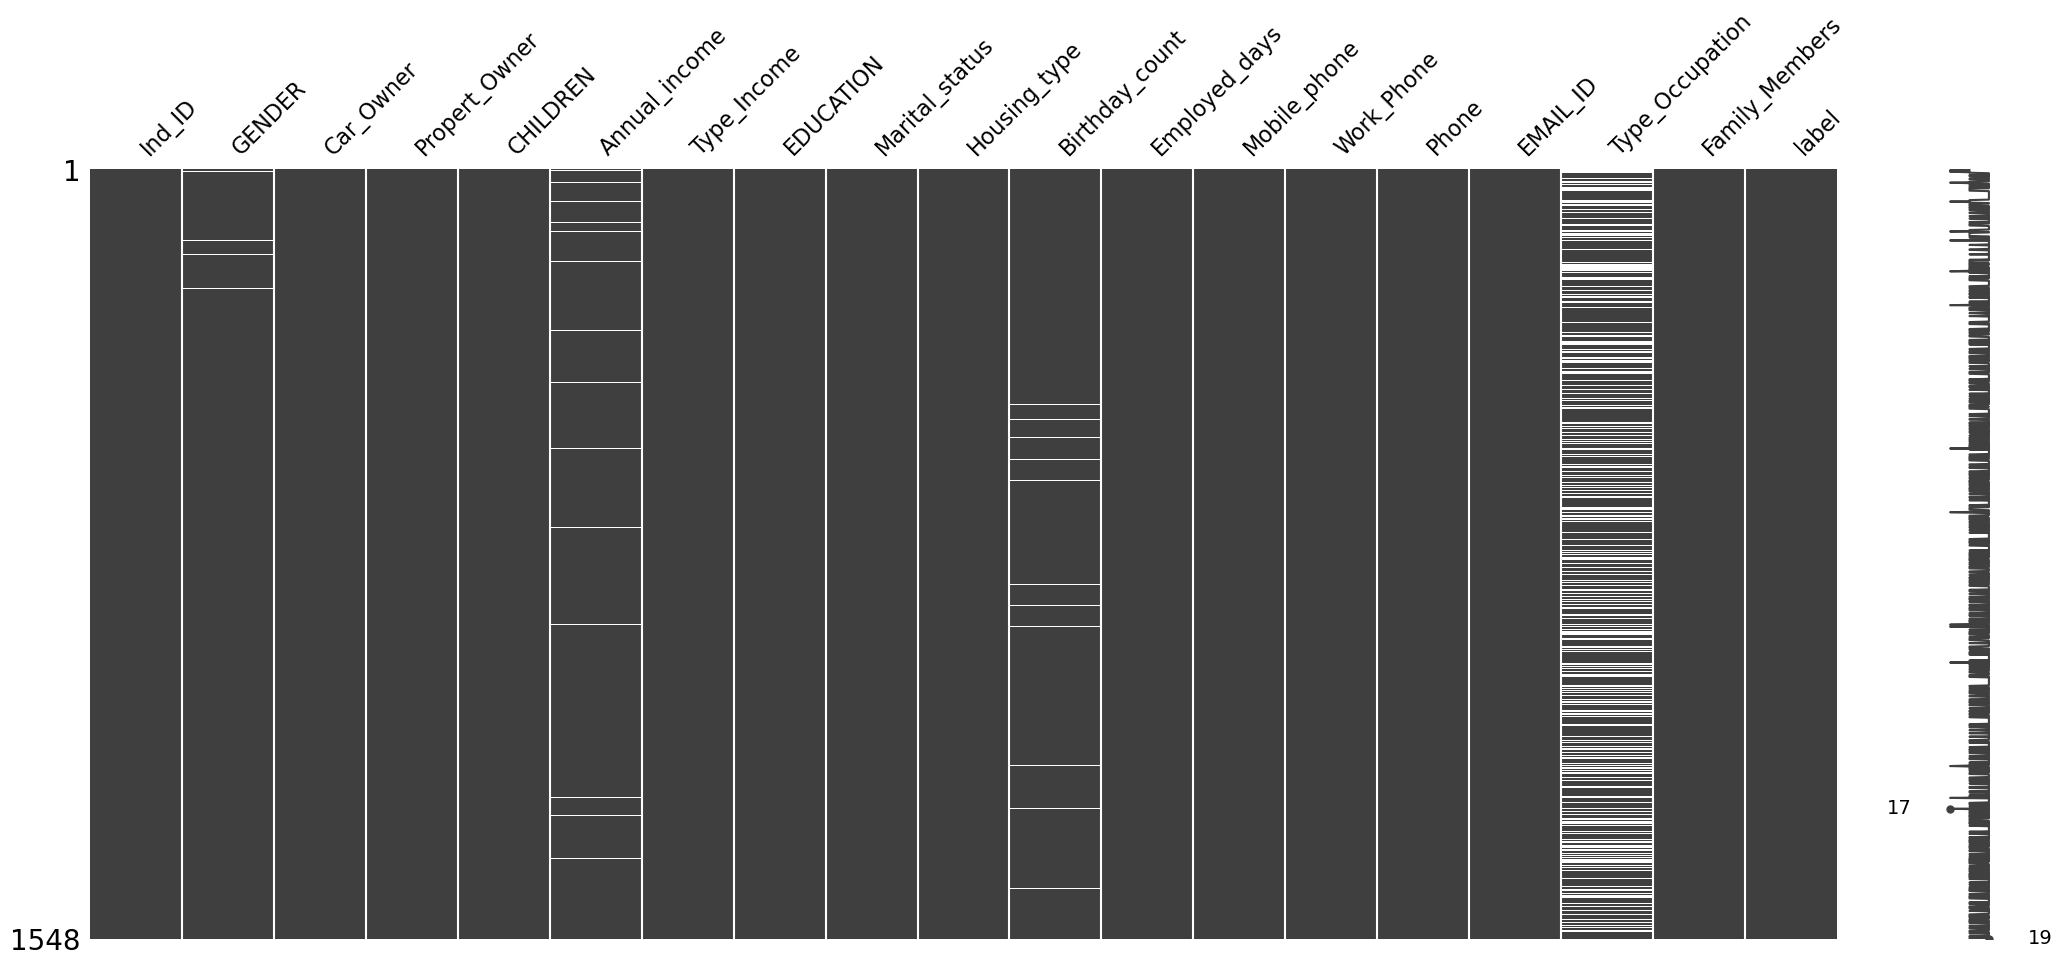

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
df['GENDER'] = df['GENDER'].fillna('M')   #Filling missing values 

df['Type_Occupation'] = df['Type_Occupation'].fillna('Other')

sub_annual_income = df[df['Type_Income']=='Commercial associate']['Annual_income'].median()
df['Annual_income'] = df['Annual_income'].fillna(sub_annual_income)

fill_median = df[df['Marital_status']=='Married']['Birthday_count'].median()
df['Birthday_count'] = df['Birthday_count'].fillna(fill_median)

In [16]:
def convert_cat(value):
    
    if value == 'Single / not married':
        return 'Single'
    elif value == 'Civil marriage':
        return 'Married'
    elif value == 'Separated' or value == 'Widow':
        return 'Single'
    else:
        return 'Married'

df['Marital_status'] = df['Marital_status'].apply(convert_cat)

In [17]:
def convert_edu(value):
    
    if value == 'Incomplete higher' or value=='Secondary / secondary special':
        return 'Higher_secondary'
    
    elif value == 'Academic degree' or value == 'Higher education':
        return 'Higher_education'
    else:
        return 'Lower_secondary'

df['EDUCATION'] = df['EDUCATION'].apply(convert_edu)

In [18]:
#Removing rows containing hypothetical values for Family member feature
indexout = df[ df['Family_Members']==15 ].index  

df = df.drop(indexout, axis=0)

In [19]:
df=df.drop(['Mobile_phone'], axis=1)  # This feature does not help to predict the label class, hence we drop it

In [20]:
def convert_it(value):    
    if value >=0:
        return 0
    else:
        return value
  
df['Employed_days'] = df['Employed_days'].apply(convert_it)

In [21]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')
    return employed_date

In [22]:
df['DAYS_EMPLOYED']=df['Employed_days'].apply(Employed_day)

df['DAYS_BIRTH']=df['Birthday_count'].apply(Date_of_Birth)

In [23]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age = today.year-dateofbirth.year
    return age

In [24]:
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(AGE)

df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(AGE)

In [25]:
df =df.drop(['Birthday_count','Employed_days'], axis=1) #dropping old features

In [26]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,DAYS_EMPLOYED,DAYS_BIRTH
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher_education,Married,House / apartment,0,0,0,Other,2,1,0,51
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher_education,Married,House / apartment,1,1,0,Other,2,1,2,37
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher_education,Married,House / apartment,1,1,0,Other,2,1,2,42
3,5009749,F,Y,N,0,202500.0,Commercial associate,Higher_education,Married,House / apartment,1,1,0,Other,2,1,2,37
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher_education,Married,House / apartment,1,1,0,Other,2,1,2,37


In [27]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
DAYS_EMPLOYED      0
DAYS_BIRTH         0
dtype: int64

# Exploratory data analysis

### a) Univariate Analysis

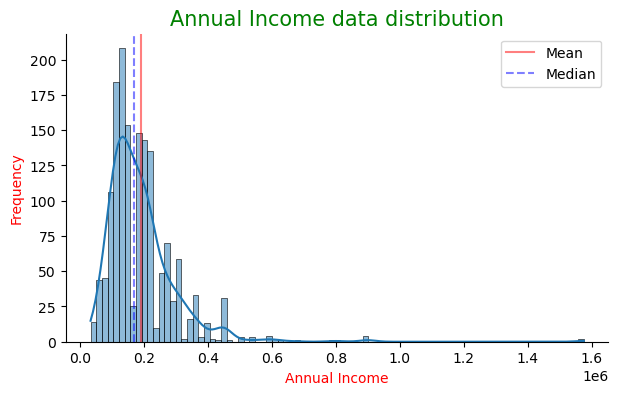

In [28]:
plt.figure(figsize=(7,4))
sns.histplot(data=df['Annual_income'], kde=True)
plt.xlabel('Annual Income',color='red')
plt.ylabel('Frequency',color='red')
plt.title("Annual Income data distribution",color = 'green',fontsize = 15)


plt.axvline(x=df.Annual_income.mean(),color='red',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.legend()
plt.show()

In [29]:
df['Annual_income'].skew() # data is right skewed

3.948376840204331

In [30]:
df['Annual_income'].median() # Median value for annual income is 171K

171000.0

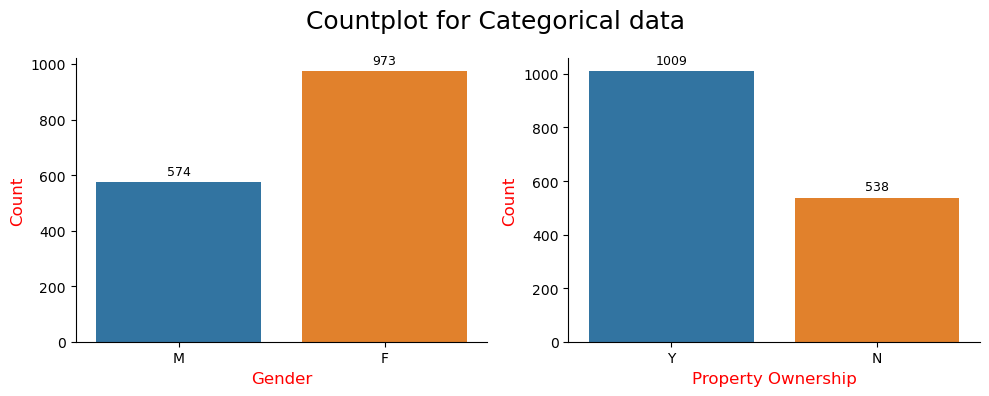

In [31]:
fig = plt.figure(figsize = (10,4))
plt.suptitle("Countplot for Categorical data", fontsize = 18)

#  subplot #1
plt.subplot(121)
ax=sns.countplot(x=df['GENDER'])
plt.xlabel('Gender',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

#  subplot #2
plt.subplot(122)
ax=sns.countplot(x=df['Propert_Owner'])
plt.xlabel('Property Ownership',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')


plt.tight_layout()
plt.show()

**Around 38 percent people are Male , rest are Female**

**Around 66 percent people owns a property**

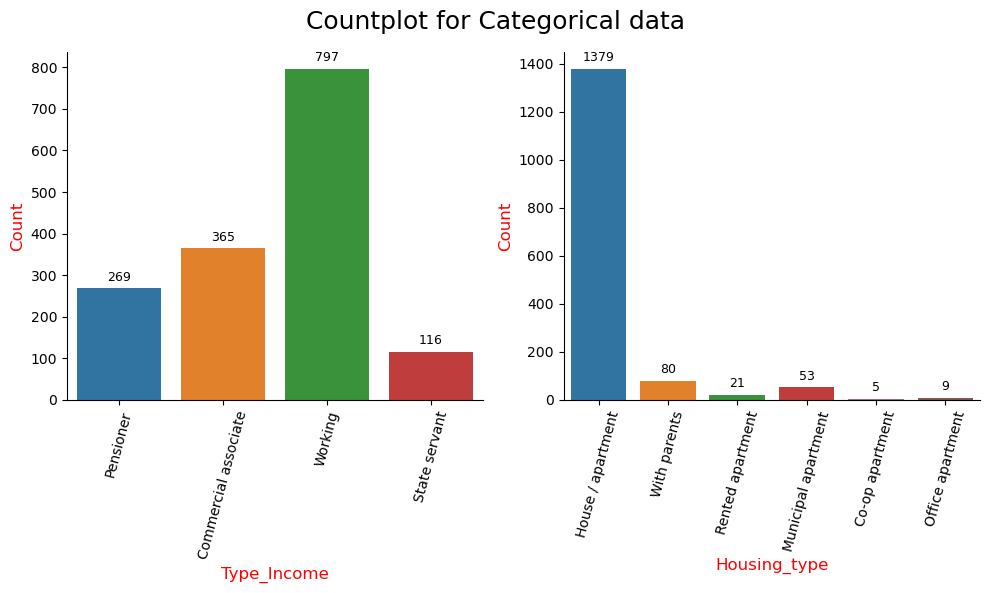

In [32]:
fig = plt.figure(figsize = (10,6))
plt.suptitle("Countplot for Categorical data", fontsize = 18)

#  subplot #1
plt.subplot(121)
ax=sns.countplot(x=df['Type_Income'])
plt.ylabel('Count',color='red',fontsize = 12)
plt.xlabel('Type_Income',color='red',fontsize = 12)
plt.xticks(rotation=75)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

    
#  subplot #1
plt.subplot(122)
ax=sns.countplot(x=df['Housing_type'])
plt.ylabel('Count',color='red',fontsize = 12)
plt.xlabel('Housing_type',color='red',fontsize = 12)
plt.xticks(rotation=75)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

 
plt.tight_layout()
plt.show()

**51 percent individual have income type as working**

**Most of the people live in their own apartment**

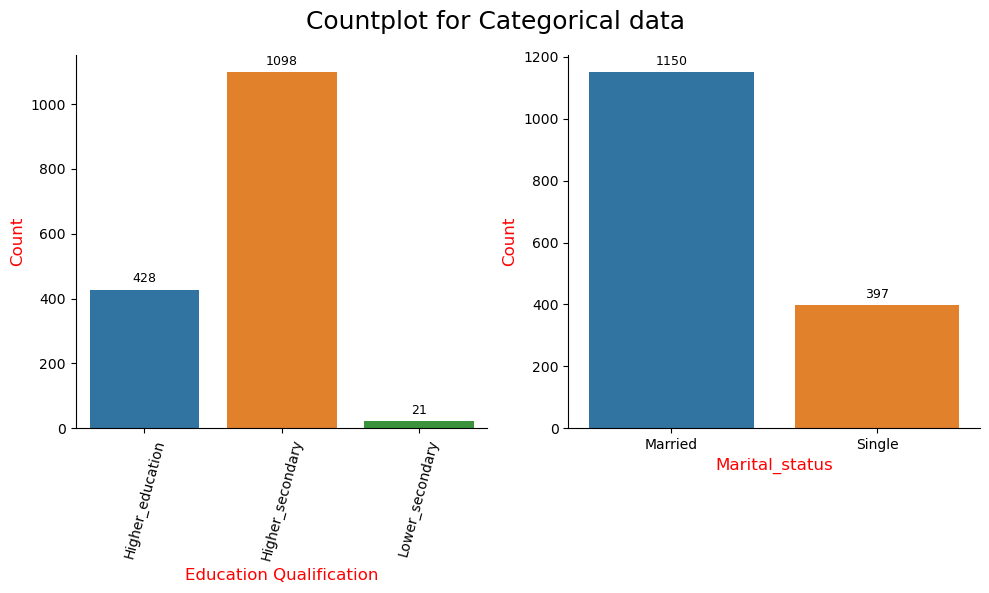

In [33]:
fig = plt.figure(figsize = (10,6))
plt.suptitle("Countplot for Categorical data", fontsize = 18)

#  subplot #1
plt.subplot(121)
ax=sns.countplot(x=df['EDUCATION'])
plt.ylabel('Count',color='red',fontsize = 12)
plt.xlabel('Education Qualification',color='red',fontsize = 12)
plt.xticks(rotation=75)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')


# subplot #2
plt.subplot(122)
ax=sns.countplot(x=df['Marital_status'])
plt.ylabel('Count',color='red',fontsize = 12)
plt.xlabel('Marital_status',color='red',fontsize = 12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

**Around 26 percent individual are single**

**Around 28 percent individual have higher education**

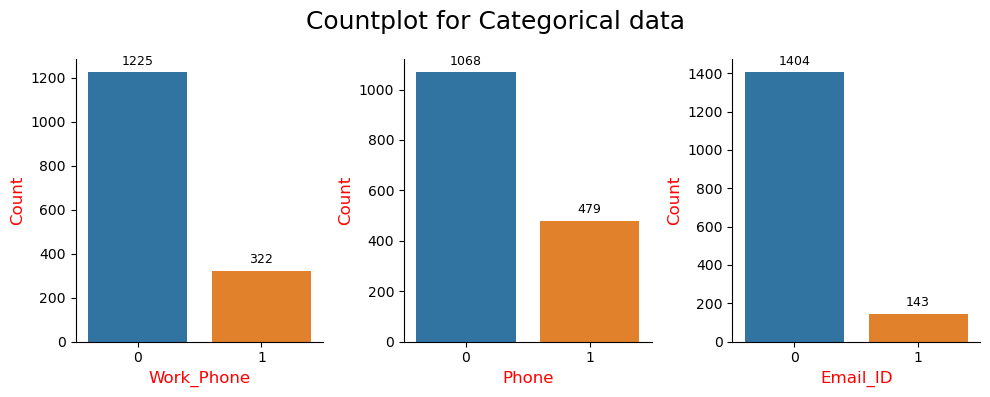

In [34]:
plt.figure(figsize=(10,4))
plt.suptitle("Countplot for Categorical data", fontsize = 18)

#  subplot #1
plt.subplot(131)
ax=sns.countplot(x=df['Work_Phone'])
plt.xlabel('Work_Phone',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')


# subplot #2
plt.subplot(132)
ax=sns.countplot(x=df['Phone'])
plt.xlabel('Phone',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

# subplot #3
plt.subplot(133)
ax=sns.countplot(x=df['EMAIL_ID'])
plt.xlabel('Email_ID',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

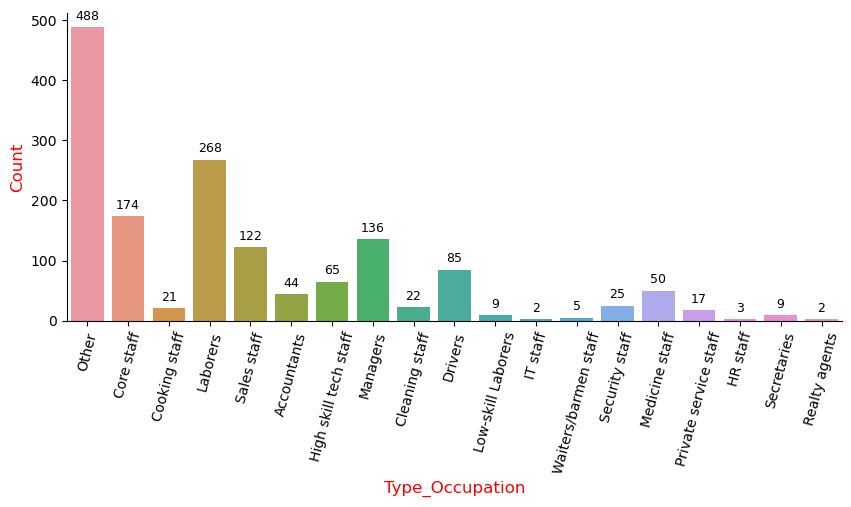

In [35]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x=df['Type_Occupation'])
plt.ylabel('Count',color='red',fontsize = 12)
plt.xlabel('Type_Occupation',color='red',fontsize = 12)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xticks(rotation=75)
plt.show()

**We have 19 different types of Occupation in our dataset**

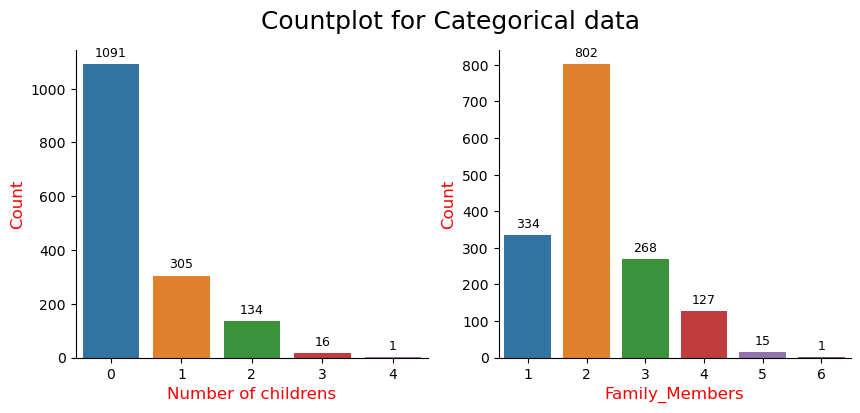

In [36]:
plt.figure(figsize=(10,4))
plt.suptitle("Countplot for Categorical data", fontsize = 18)

plt.subplot(121)
ax=sns.countplot(x=df['CHILDREN'])
plt.xlabel('Number of childrens',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')


plt.subplot(122)
ax=sns.countplot(x=df['Family_Members'])
plt.xlabel('Family_Members',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.show()

**About 71 percent individual have no children**

**About 79 percent of individual have 2 or more family members**

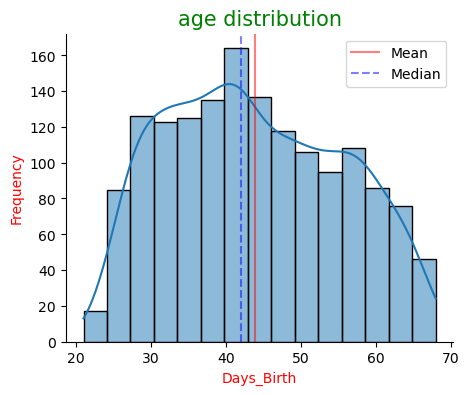

In [37]:
plt.figure(figsize=(5,4))
sns.histplot(data=df['DAYS_BIRTH'], kde=True)
plt.xlabel('Days_Birth',color='red')
plt.ylabel('Frequency',color='red')
plt.title("age distribution",color = 'green',fontsize = 15)

plt.axvline(x=df.DAYS_BIRTH.mean(),color='red',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df.DAYS_BIRTH.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.legend()
plt.show()

**Median age for individual in our dataset is 42 years**

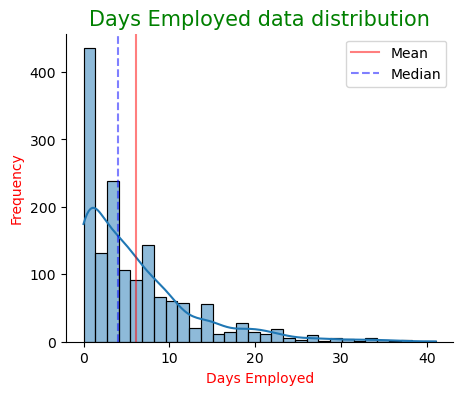

In [38]:
plt.figure(figsize=(5,4))
sns.histplot(data=df['DAYS_EMPLOYED'], kde=True)
plt.xlabel('Days Employed',color='red')
plt.ylabel('Frequency',color='red')
plt.title("Days Employed data distribution",color = 'green',fontsize = 15)


plt.axvline(x=df.DAYS_EMPLOYED.mean(),color='red',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df.DAYS_EMPLOYED.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.legend()
plt.show()

In [39]:
df['DAYS_EMPLOYED'].skew() #Right skewed data

1.7337953863871796

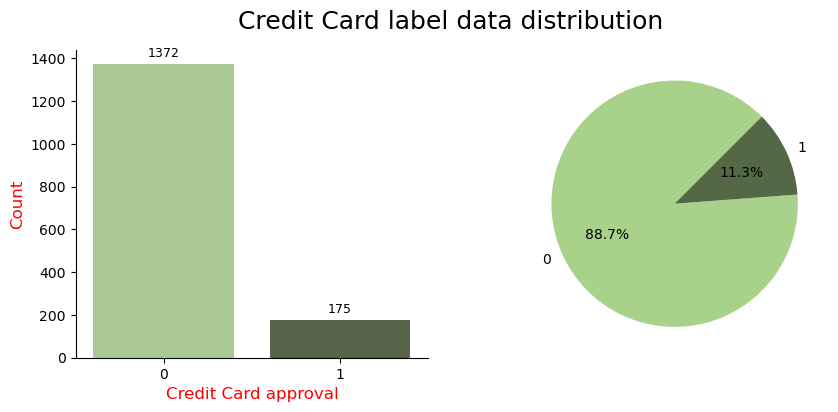

In [40]:
plt.figure(figsize=(10,4))
plt.suptitle("Credit Card label data distribution", fontsize = 18)

plt.subplot(121)
colors = ['#a8d18a','#546845']
ax=sns.countplot(x=df['label'], palette=colors)
plt.xlabel('Credit Card approval',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)
#plt.title('Count Plot',color = 'green',fontsize = 15)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
    
plt.subplot(122)
colors = ['#a8d18a','#546845']
labels = df['label'].value_counts().index
sizes = df['label'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
#plt.title('Pie Plot',color = 'green',fontsize = 15)

plt.show()

**Only 11% people in the dataset got their credit card approved**

## b) Bivariate analysis

Text(0.5, 1.0, 'Days Employed v/s Credit label')

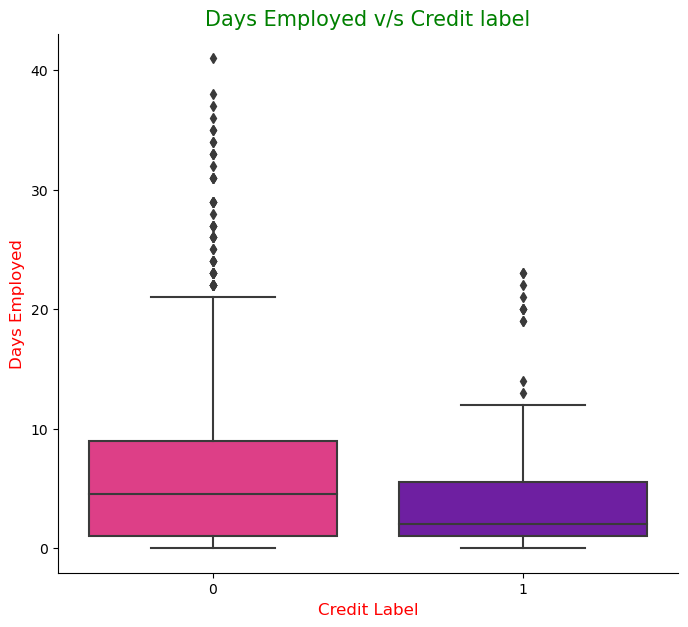

In [41]:
plt.figure(figsize=(8,7))

sns.boxplot(x=df['label'],y=df['DAYS_EMPLOYED'],palette=["#F72585", "#7209B7"])
plt.xlabel('Credit Label',color='red',fontsize = 12)
plt.ylabel('Days Employed',color='red',fontsize = 12)
plt.title('Days Employed v/s Credit label', color='green',fontsize = 15)

**Higher your employed days the lower your credit card approval chances**

Text(0.5, 1.0, 'Type of Income v/s Days Employed')

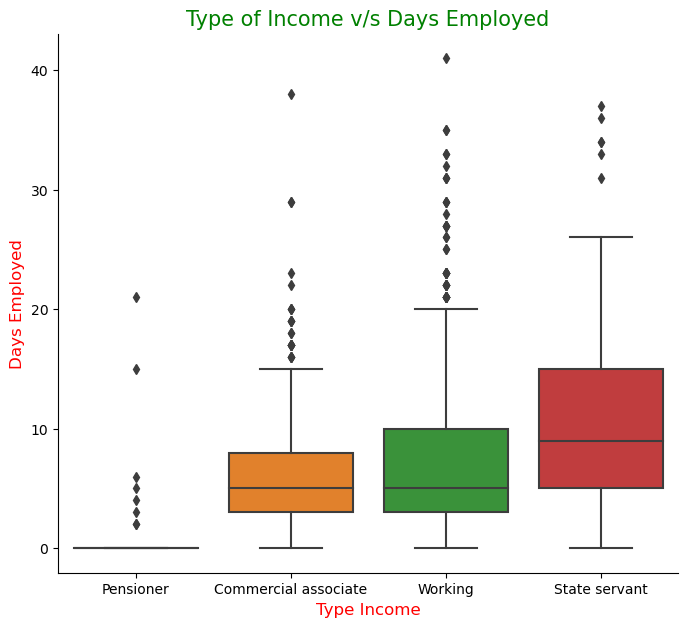

In [42]:
plt.figure(figsize=(8,7))

sns.boxplot(x=df['Type_Income'],y=df['DAYS_EMPLOYED'])
plt.xlabel('Type Income',color='red',fontsize = 12)
plt.ylabel('Days Employed',color='red',fontsize = 12)
plt.title('Type of Income v/s Days Employed', color='green',fontsize = 15)

**Pensioners and Commercial associate has a higher chance of credit approval since they have less employed days compared to other**

Text(0.5, 1.0, 'Type of income v/s Annual cost')

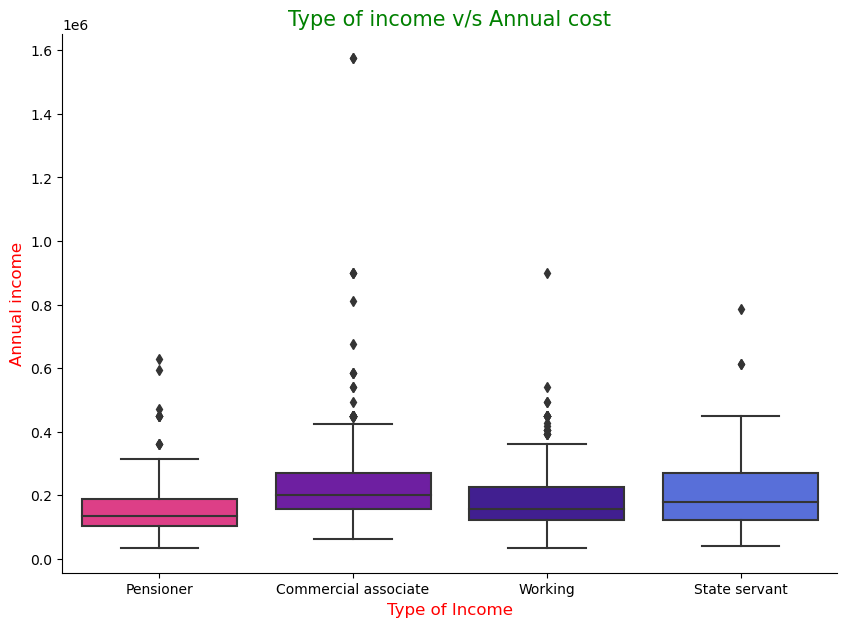

In [43]:
plt.figure(figsize=(10,7))

sns.boxplot(x=df['Type_Income'],y=df['Annual_income'],palette=["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"])
plt.xlabel('Type of Income',color='red',fontsize = 12)
plt.ylabel('Annual income',color='red',fontsize = 12)
plt.title('Type of income v/s Annual cost', color='green',fontsize = 15)

**Commercial associate and State servent are high paying jobs**

Text(0.5, 1.0, 'Gender v/s Annual cost')

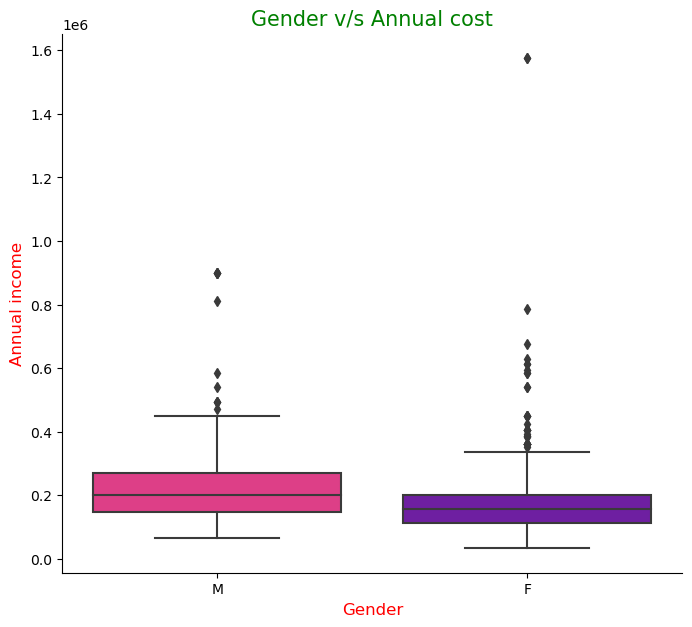

In [44]:
plt.figure(figsize=(8,7))

sns.boxplot(x=df['GENDER'],y=df['Annual_income'],palette=["#F72585", "#7209B7"])
plt.xlabel('Gender',color='red',fontsize = 12)
plt.ylabel('Annual income',color='red',fontsize = 12)
plt.title('Gender v/s Annual cost', color='green',fontsize = 15)

**Male earn more on an average than Female**

Text(0.5, 1.0, 'Marital_status v/s Annual cost')

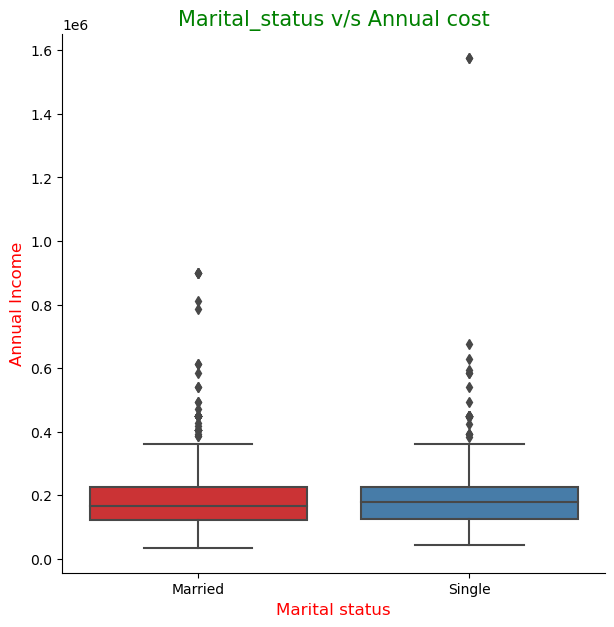

In [45]:
plt.figure(figsize=(7,7))

sns.boxplot(x=df['Marital_status'],y=df['Annual_income'],palette='Set1')
plt.xlabel('Marital status',color='red',fontsize = 12)
plt.ylabel('Annual Income',color='red',fontsize = 12)
plt.title('Marital_status v/s Annual cost', color='green',fontsize = 15)

**Individual who are single or married have similar median annual income**

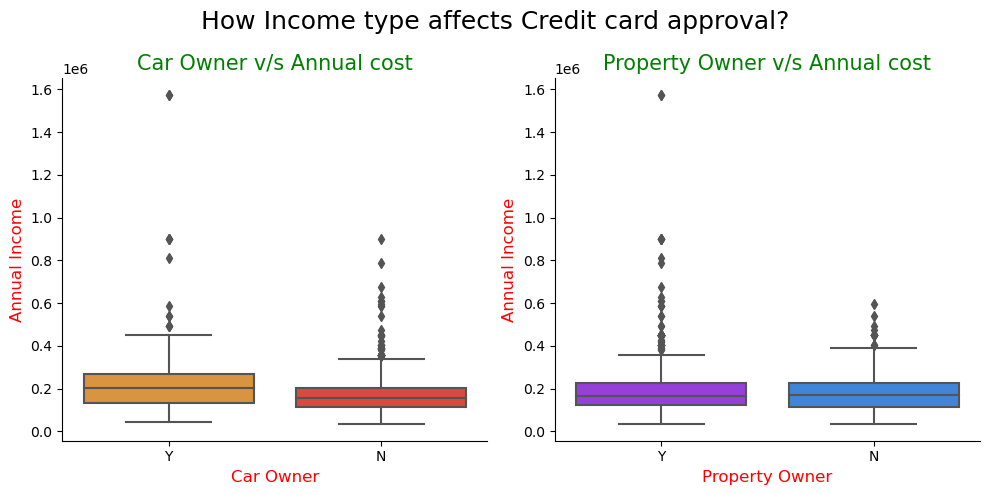

In [46]:
plt.figure(figsize=(10,5))
plt.suptitle("How Income type affects Credit card approval?", fontsize = 18)

plt.subplot(121)
sns.boxplot(x=df['Car_Owner'],y=df['Annual_income'], palette = ['#f29727','#f23227'])
plt.xlabel('Car Owner',color='red',fontsize = 12)
plt.ylabel('Annual Income',color='red',fontsize = 12)
plt.title('Car Owner v/s Annual cost', color='green',fontsize = 15)

plt.subplot(122)
sns.boxplot(x=df['Propert_Owner'],y=df['Annual_income'],palette = ['#9727f2','#2782f2'])
plt.xlabel('Property Owner',color='red',fontsize = 12)
plt.ylabel('Annual Income',color='red',fontsize = 12)
plt.title('Property Owner v/s Annual cost', color='green',fontsize = 15)

plt.tight_layout()
plt.show()

**Car Owners definitely have higher annual average income whereas Property Owners have nearly same annual average income**

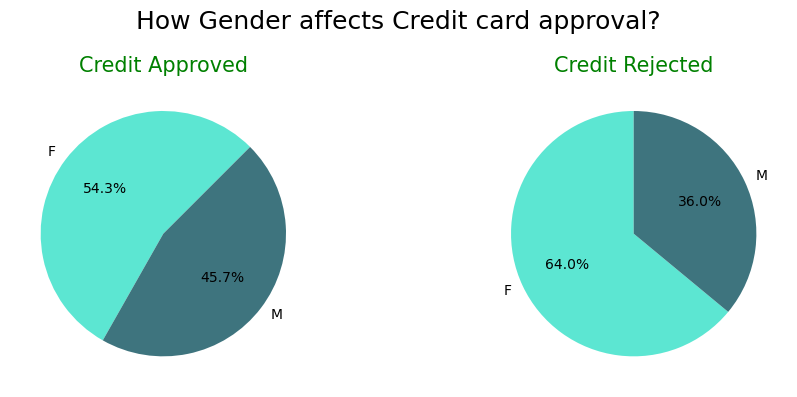

In [47]:
plt.figure(figsize=(10,4))
plt.suptitle("How Gender affects Credit card approval?",fontsize = 18)

colors = ['#5ce6d2','#3e747e']

plt.subplot(121)
labels = df[df["label"]==1]['GENDER'].value_counts().index
sizes = df[df["label"]==1]['GENDER'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['GENDER'].value_counts().index
sizes = df[df["label"]==0]['GENDER'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Around 46 percent of Males have their credit card approved, this maybe due to them having higher average annual income then females**

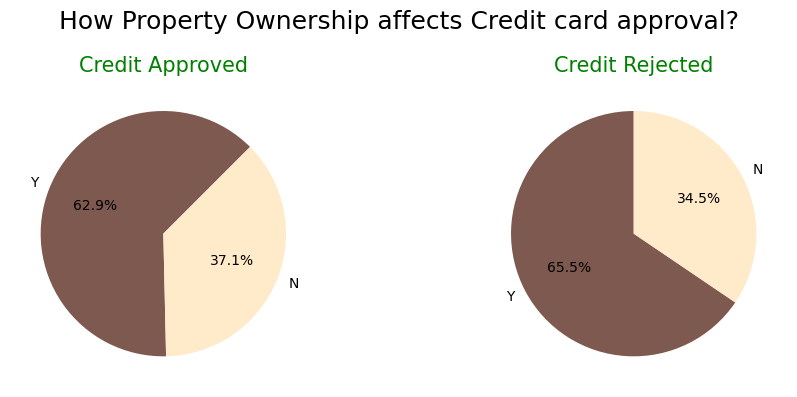

In [48]:
plt.figure(figsize=(10,4))
plt.suptitle("How Property Ownership affects Credit card approval?", fontsize = 18)

colors = ['#7e594f','#ffeaca']

plt.subplot(121)
labels = df[df["label"]==1]['Propert_Owner'].value_counts().index
sizes = df[df["label"]==1]['Propert_Owner'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['Propert_Owner'].value_counts().index
sizes = df[df["label"]==0]['Propert_Owner'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Property Ownership have no significant impact on credit card approval**

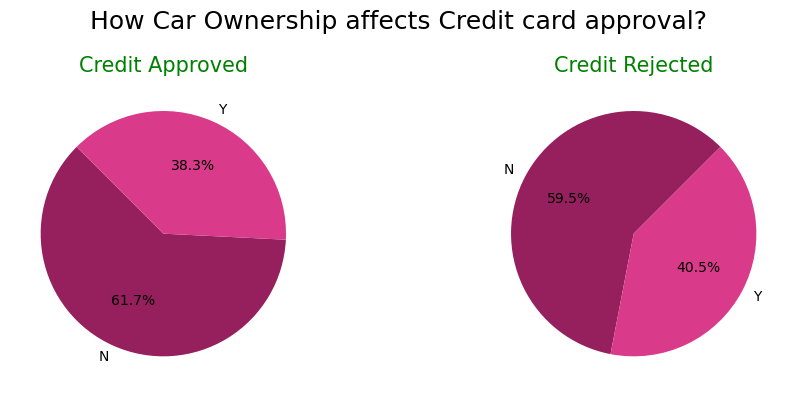

In [49]:
plt.figure(figsize=(10,4))
plt.suptitle("How Car Ownership affects Credit card approval?", fontsize = 18)

colors = ['#95205d','#d93a89']

plt.subplot(121)
labels = df[df["label"]==1]['Car_Owner'].value_counts().index
sizes = df[df["label"]==1]['Car_Owner'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=135,colors=colors)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['Car_Owner'].value_counts().index
sizes = df[df["label"]==0]['Car_Owner'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Car Ownership have no  significant impact on Credit Card approval**

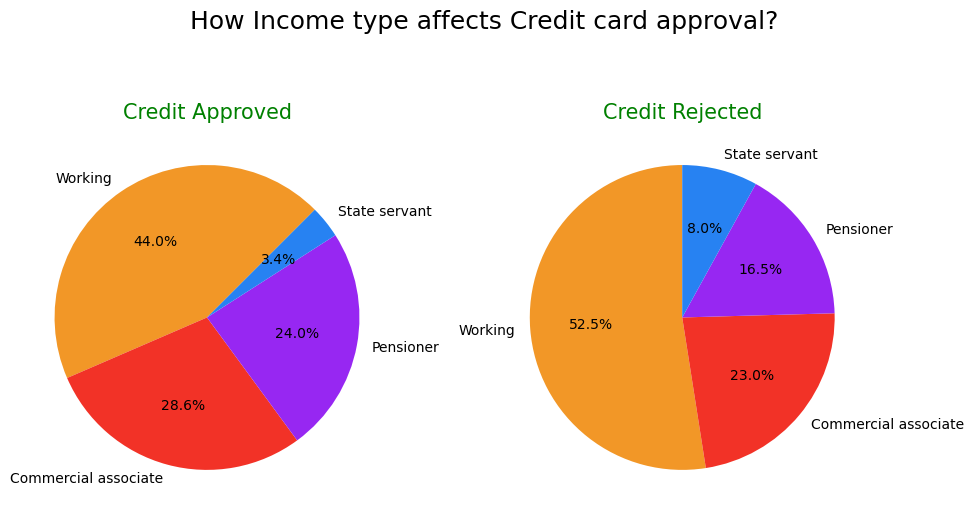

In [50]:
plt.figure(figsize=(10,6))
plt.suptitle("How Income type affects Credit card approval?", fontsize = 18)

colors = ['#f29727','#f23227','#9727f2','#2782f2']

plt.subplot(121)
labels = df[df["label"]==1]['Type_Income'].value_counts().index
sizes = df[df["label"]==1]['Type_Income'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['Type_Income'].value_counts().index
sizes = df[df["label"]==0]['Type_Income'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Pensioner and Commercial associate has higher credit approval chances** 

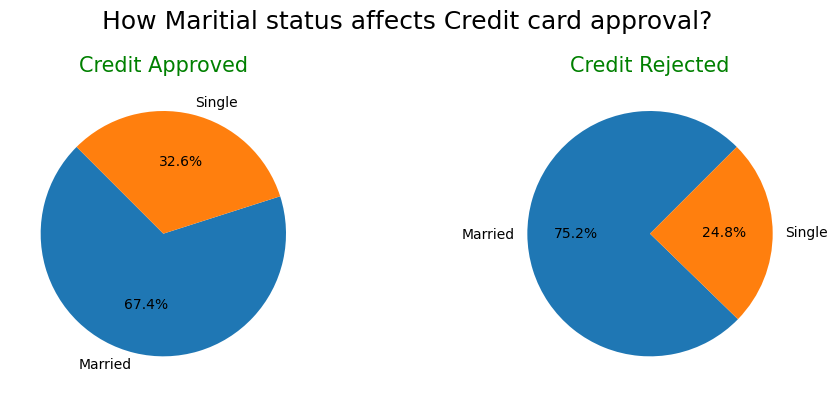

In [51]:
plt.figure(figsize=(10,4))
plt.suptitle("How Maritial status affects Credit card approval?", fontsize = 18)

#colors = ['green','pink','magenta','cyan',"orange","yellow"]

plt.subplot(121)
labels = df[df["label"]==1]['Marital_status'].value_counts().index
sizes = df[df["label"]==1]['Marital_status'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=135)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['Marital_status'].value_counts().index
sizes = df[df["label"]==0]['Marital_status'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Individual with marital status as single has higher chance of credit approval, since they have higher  median annual income**

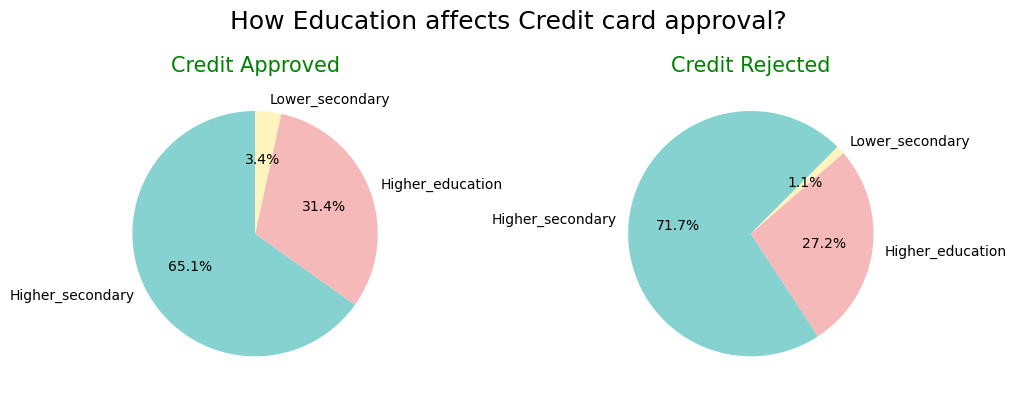

In [52]:
plt.figure(figsize=(10,4))
plt.suptitle("How Education affects Credit card approval?", fontsize = 18)

colors = ['#85d2d0','#f4b9b8','#fff4bd']

plt.subplot(121)
labels = df[df["label"]==1]['EDUCATION'].value_counts().index
sizes = df[df["label"]==1]['EDUCATION'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Credit Approved',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["label"]==0]['EDUCATION'].value_counts().index
sizes = df[df["label"]==0]['EDUCATION'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Credit Rejected',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Higher education may or may not give you credit card approval**

Text(0.5, 1.0, 'How Annual income affects Credit approval?')

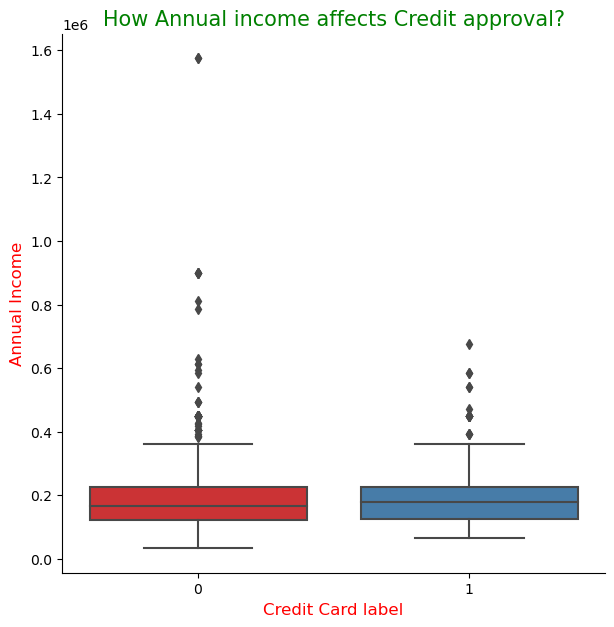

In [53]:
plt.figure(figsize=(7,7))

sns.boxplot(x=df['label'],y=df['Annual_income'],palette='Set1')
plt.xlabel('Credit Card label',color='red',fontsize = 12)
plt.ylabel('Annual Income',color='red',fontsize = 12)
plt.title('How Annual income affects Credit approval?', color='green',fontsize = 15)

**Higher annual income may or may not give you credit approval**

Text(0.5, 1.0, 'Credit label v/s Age')

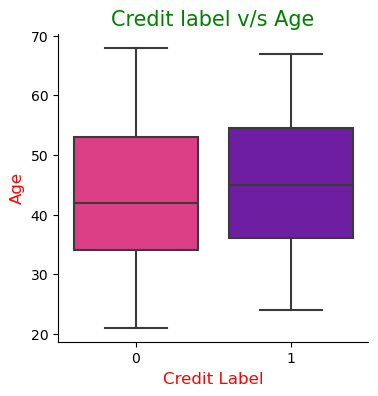

In [54]:
plt.figure(figsize=(4,4))

sns.boxplot(x=df['label'],y=df['DAYS_BIRTH'],palette=["#F72585", "#7209B7"])
plt.xlabel('Credit Label',color='red',fontsize = 12)
plt.ylabel('Age',color='red',fontsize = 12)
plt.title('Credit label v/s Age', color='green',fontsize = 15)

**Credit approved individual has higher average age**

## Detecting and Treating Outlier 

Text(0, 0.5, 'Value')

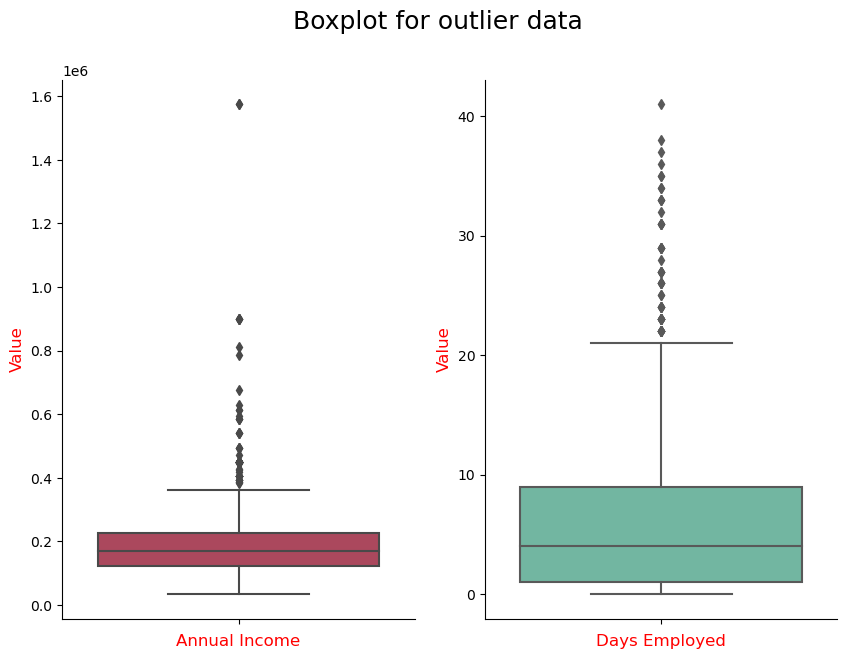

In [55]:
plt.figure(figsize=(10,7))
plt.suptitle("Boxplot for outlier data", fontsize = 18)

plt.subplot(121)
sns.boxplot(y=df['Annual_income'], palette='inferno')
plt.xlabel('Annual Income',color='red',fontsize = 12)
plt.ylabel('Value',color='red',fontsize = 12)
#plt.title('Annual Income boxplot', color='green',fontsize = 15)

plt.subplot(122)
sns.boxplot(y=df['DAYS_EMPLOYED'], palette='Set2')
plt.xlabel('Days Employed',color='red',fontsize = 12)
plt.ylabel('Value',color='red',fontsize = 12)
#plt.title('DAYS_EMPLOYED boxplot', color='green',fontsize = 15)


**We can see all the outliers for both features which need to be dealt with**

In [56]:
p_95 = df['Annual_income'].quantile(0.9) # 90th quantile

df["Annual_income"] = np.where(df["Annual_income"] > p_95, df['Annual_income'].median(), df['Annual_income'])


p_95 = df['DAYS_EMPLOYED'].quantile(0.9) # 90th quantile

df["DAYS_EMPLOYED"] = np.where(df["DAYS_EMPLOYED"] > p_95, df['DAYS_EMPLOYED'].median(), df['DAYS_EMPLOYED'])


In [57]:
df['Annual_income'].skew() #data is almost symmetrical

0.45801888576553523

In [58]:
df['DAYS_EMPLOYED'].skew() 

#data is still right skewed, need to apply data transformation methods to make it normally distributed

0.849893648015617

## Feature Engineering

In [59]:
df1=df.copy()

In [60]:
#Transforming right skewed data using square root method

df1['DAYS_EMPLOYED'] = np.sqrt(df1['DAYS_EMPLOYED'])  

In [61]:
df1['EDUCATION']=df1.EDUCATION.map( {'Lower_secondary':0, 'Higher_secondary':1, 'Higher_education':2})

In [62]:
df1_variables = df1[['GENDER','Car_Owner', 'Propert_Owner','Marital_status','Work_Phone','Phone']]
df1_dummies = pd.get_dummies(df1_variables, drop_first=True)
df1_dummies.head()

,Work_Phone,Phone,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Marital_status_Single
0,0,0,1,1,1,0
1,1,1,0,1,0,0
2,1,1,0,1,0,0
3,1,1,0,1,0,0
4,1,1,0,1,0,0


In [63]:
df1 = df1.drop(['Ind_ID','GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status', 'Housing_type','EMAIL_ID','Type_Occupation','Work_Phone','Phone','CHILDREN'], axis=1)
df1 = pd.concat([df1, df1_dummies], axis=1)
df1.head()

,Annual_income,Family_Members,label,DAYS_EMPLOYED,DAYS_BIRTH,Work_Phone,Phone,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Marital_status_Single
0,180000.0,2,1,0.000000,51,0,0,1,1,1,0
1,315000.0,2,1,1.414214,37,1,1,0,1,0,0
2,315000.0,2,1,1.414214,42,1,1,0,1,0,0
3,202500.0,2,1,1.414214,37,1,1,0,1,0,0
4,315000.0,2,1,1.414214,37,1,1,0,1,0,0


In [64]:
df1.shape

(1547, 11)

<AxesSubplot:>

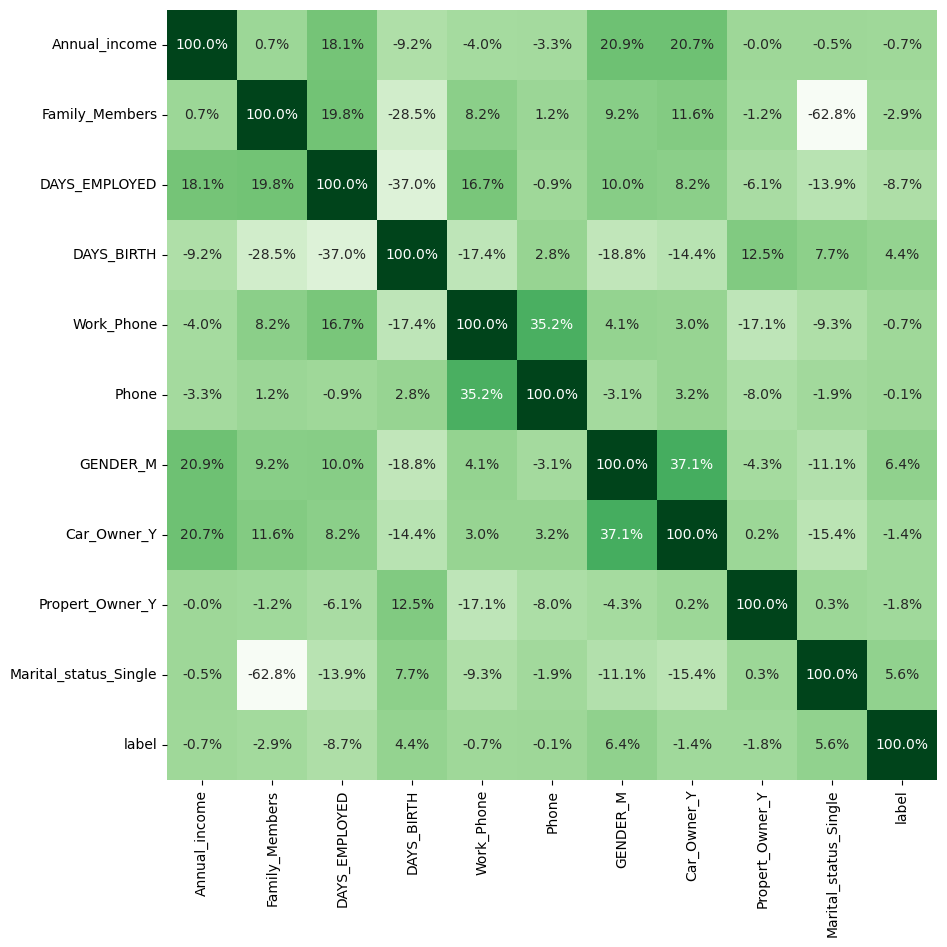

In [65]:
corr = df1[ ['Annual_income','Family_Members','DAYS_EMPLOYED','DAYS_BIRTH','Work_Phone','Phone','GENDER_M','Car_Owner_Y','Propert_Owner_Y','Marital_status_Single','label'] ].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, fmt='.1%', annot=True, cmap='Greens')

## Train Test Split

In [66]:
x = df1.drop(['label'], axis = 1)
y = df1['label']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [68]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (1082, 10)
Shape of x_test:  (465, 10)
Shape of y_train:  (1082,)
Shape of y_test:  (465,)


In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

In [70]:
from collections import Counter

from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE ENN
sm = SMOTEENN()

x_train_sm, y_train_sm = sm.fit_resample(x_train_ss, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 950, 1: 132})
After Counter({1: 769, 0: 654})


## Model Building

In [71]:
# To store results of models
result_dict_model = []
result_dict_train = []
result_dict_test = []

### 1) Gradient Boosting

In [72]:
gb1 = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gb1, x_train_ss, y_train, cv=5)
gb1.fit(x_train_ss,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gb1.score(x_test_ss,y_test))

Train Score: 0.8789255845707459
Test Score: 0.9075268817204301


In [73]:
result_dict_model.append("GB Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(gb1.score(x_test_ss,y_test))

In [74]:
y_pred = gb1.predict(x_test_ss)
y_prob = gb1.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[420   2]
 [ 41   2]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.50      0.05      0.09        43

    accuracy                           0.91       465
   macro avg       0.71      0.52      0.52       465
weighted avg       0.87      0.91      0.87       465

AUC-ROC
0.6575278298247547


**Recall values for minority class is almost zero, our machine learning model treat this data as a noise**

**Therefore it is of utmost importance to train out machine learning models with balanced dataset**

## 2) Decision Tree

In [75]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, x_train_ss, y_train, cv=5)
dt.fit(x_train_ss,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dt.score(x_test_ss,y_test))

Train Score: 0.815173237753883
Test Score: 0.832258064516129


In [76]:
result_dict_model.append("DT Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(dt.score(x_test_ss,y_test))

### 3) Random Forest

In [77]:
rf = RandomForestClassifier()
accuracies = cross_val_score(rf, x_train_ss, y_train, cv=5)
rf.fit(x_train_ss,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf.score(x_test_ss,y_test))

Train Score: 0.8992618194231097
Test Score: 0.9397849462365592


In [78]:
result_dict_model.append("RF Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(rf.score(x_test_ss,y_test))

In [79]:
y_pred = rf.predict(x_test_ss)
y_prob = rf.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[417   5]
 [ 23  20]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       422
           1       0.80      0.47      0.59        43

    accuracy                           0.94       465
   macro avg       0.87      0.73      0.78       465
weighted avg       0.93      0.94      0.93       465

AUC-ROC
0.8169293508211177


### 4) Logistic Regression

In [80]:
lr_model = LogisticRegression()
accuracies = cross_val_score(lr_model, x_train_ss, y_train, cv=5)
lr_model.fit(x_train_ss, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(x_test_ss,y_test))

Train Score: 0.8780081925243216
Test Score: 0.9075268817204301


In [81]:
result_dict_model.append("LR Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(lr_model.score(x_test_ss,y_test))

### 5) K nearest neighbour

In [82]:
knn_model = KNeighborsClassifier()

accuracies = cross_val_score(knn_model, x_train_ss, y_train, cv=5)
knn_model.fit(x_train_ss, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn_model.score(x_test_ss,y_test))

Train Score: 0.8669354838709677
Test Score: 0.8774193548387097


In [83]:
result_dict_model.append("KNN Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(knn_model.score(x_test_ss,y_test))

### 6) Naive Bayes

In [84]:
nb = GaussianNB()

accuracies = cross_val_score(nb, x_train_ss, y_train, cv=5)
nb.fit(x_train_ss,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb.score(x_test_ss,y_test))

Train Score: 0.8780081925243216
Test Score: 0.9075268817204301


In [85]:
result_dict_model.append("NB Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(nb.score(x_test_ss,y_test))

### 7) Support Vector Machine

In [86]:
svc=SVC()

accuracies = cross_val_score(svc, x_train_ss, y_train, cv=5)
svc.fit(x_train_ss,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test_ss,y_test))

Train Score: 0.8780081925243216
Test Score: 0.9075268817204301


In [87]:
result_dict_model.append("SVC Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(svc.score(x_test_ss,y_test))

## Model Evaluation( on imbalanced dataset)

In [88]:
model_df = pd.DataFrame({'Model':result_dict_model ,'Train_Score': result_dict_train,'Test_Score':result_dict_test})

model_df.sort_values(by=['Test_Score','Train_Score'], ascending=False).reset_index(drop=True)

,Model,Train_Score,Test_Score
0,RF Default,0.899262,0.939785
1,GB Default,0.878926,0.907527
2,LR Default,0.878008,0.907527
3,NB Default,0.878008,0.907527
4,SVC Default,0.878008,0.907527
5,KNN Default,0.866935,0.877419
6,DT Default,0.815173,0.832258


## Model Evaluation (on balanced dataset using SMOTEENN)

### 1) Gradient Boosting

In [89]:
# Applying SmoteENN on Gradient Boosting

#Here upsampling is selected over downsampling , so that we dont lose any valuable information from the dataset 
#which might affect our model accuracy and prediction

#We go with  SMOTEENN since it gives better result than SMOTE by cleaning the misclassified data points

gb2 = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gb2, x_train_sm, y_train_sm, cv=5)
gb2.fit(x_train_sm,y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gb2.score(x_test_ss,y_test))

Train Score: 0.9079639238942427
Test Score: 0.7913978494623656


In [90]:
y_pred = gb2.predict(x_test_ss)
y_prob = gb2.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[353  69]
 [ 28  15]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       422
           1       0.18      0.35      0.24        43

    accuracy                           0.79       465
   macro avg       0.55      0.59      0.56       465
weighted avg       0.86      0.79      0.82       465

AUC-ROC
0.6590708696131379


### 2) Naive Bayes

In [91]:
nb2 = GaussianNB()

accuracies = cross_val_score(nb2, x_train_sm, y_train_sm, cv=5)
nb2.fit(x_train_sm,y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb2.score(x_test_ss,y_test))

Train Score: 0.671818631084754
Test Score: 0.43010752688172044


In [92]:
y_pred = nb2.predict(x_test_ss)
y_prob = nb2.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[168 254]
 [ 11  32]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.40      0.56       422
           1       0.11      0.74      0.19        43

    accuracy                           0.43       465
   macro avg       0.53      0.57      0.38       465
weighted avg       0.86      0.43      0.53       465

AUC-ROC
0.5891105477791249


### 3) Random Forest

In [93]:
rf2 = RandomForestClassifier()
accuracies = cross_val_score(rf2, x_train_sm, y_train_sm, cv=5)
rf2.fit(x_train_sm,y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf2.score(x_test_ss,y_test))

Train Score: 0.9704941932295528
Test Score: 0.8602150537634409


In [94]:
y_pred = rf2.predict(x_test_ss)
y_prob = rf2.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[379  43]
 [ 22  21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       422
           1       0.33      0.49      0.39        43

    accuracy                           0.86       465
   macro avg       0.64      0.69      0.66       465
weighted avg       0.89      0.86      0.87       465

AUC-ROC
0.735175796318748


### 4) Support Vector Machines

In [95]:
svc2=SVC(probability=True)

accuracies = cross_val_score(svc2, x_train_sm, y_train_sm, cv=5)
svc2.fit(x_train_sm,y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc2.score(x_test_ss,y_test))

Train Score: 0.9001976772918212
Test Score: 0.6817204301075269


In [96]:
y_pred = svc2.predict(x_test_ss)
y_prob = svc2.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[293 129]
 [ 19  24]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       422
           1       0.16      0.56      0.24        43

    accuracy                           0.68       465
   macro avg       0.55      0.63      0.52       465
weighted avg       0.87      0.68      0.75       465

AUC-ROC
0.6786068555053455


## Hyper parameter Tuning( on Random Forest)

In [97]:
# Final Model

rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
             "max_depth": [3,5,8,None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_cv_model.fit(x_train_sm, y_train_sm)

rf_cv_model.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [98]:
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_)

accuracies = cross_val_score(rf_tuned, x_train_sm, y_train_sm, cv=5)
rf_tuned.fit(x_train_sm, y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf_tuned.score(x_test_ss,y_test))

Train Score: 0.9740079070916728
Test Score: 0.8580645161290322


In [99]:
y_pred = rf_tuned.predict(x_test_ss)
y_prob = rf_tuned.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[381  41]
 [ 25  18]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       422
           1       0.31      0.42      0.35        43

    accuracy                           0.86       465
   macro avg       0.62      0.66      0.64       465
weighted avg       0.88      0.86      0.87       465

AUC-ROC
0.7540229251625704


## Hyper parameter Tuning( on Gradient Boosting)

In [100]:
# Final Model

gbm_model = GradientBoostingClassifier()

# Model Tuning
gbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "max_depth": [3,5, 8, 10],
               "n_estimators": [200, 500, 1000],
               "subsample": [1, 0.5, 0.8]}

gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=1)
gbm_cv_model.fit(x_train_sm, y_train_sm)

gbm_cv_model.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.8}

In [101]:
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_)

accuracies = cross_val_score(gbm_tuned, x_train_sm, y_train_sm, cv=5)
gbm_tuned.fit(x_train_sm, y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gbm_tuned.score(x_test_ss,y_test))

Train Score: 0.9648801581418335
Test Score: 0.864516129032258


In [102]:
y_pred = gbm_tuned.predict(x_test_ss)
y_prob = gbm_tuned.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[382  40]
 [ 23  20]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       422
           1       0.33      0.47      0.39        43

    accuracy                           0.86       465
   macro avg       0.64      0.69      0.66       465
weighted avg       0.89      0.86      0.87       465

AUC-ROC
0.7550424335941806


## Hyper parameter Tuning( on SVM)

In [103]:
# Final Model

svm_model = SVC(probability=True)

# Model Tuning
svm_params = { 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']}

svm_cv_model = GridSearchCV(svm_model, svm_params, cv=5, n_jobs=-1, verbose=1)
svm_cv_model.fit(x_train_sm, y_train_sm)

svm_cv_model.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'gamma': 1, 'kernel': 'rbf'}

In [104]:
svm_tuned = SVC(**svm_cv_model.best_params_,probability=True)

accuracies = cross_val_score(svm_tuned, x_train_sm, y_train_sm, cv=5)
svm_tuned.fit(x_train_sm, y_train_sm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svm_tuned.score(x_test_ss,y_test))

Train Score: 0.9915591796392389
Test Score: 0.821505376344086


In [105]:
y_pred = svm_tuned.predict(x_test_ss)
y_prob = svm_tuned.predict_proba(x_test_ss)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[361  61]
 [ 22  21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       422
           1       0.26      0.49      0.34        43

    accuracy                           0.82       465
   macro avg       0.60      0.67      0.62       465
weighted avg       0.88      0.82      0.85       465

AUC-ROC
0.7295822770858591


### Observations

1)We obtain better recall values with balanced dataset using SMOTEENN for all our machine learning models

2)Random Forest not only gives us highest accuracy but also gives higher recall value than other machine learning models

3)Random Forest can deal with the outliers better than other machine learning models

4)AUC-ROC for Random Forest is highest among all 

# SQL

## Use MySQL or PyMySQL to perform the below queries.

In [192]:
import pymysql

In [193]:
# To connect MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root', 
    password = "#########",
    db='CreditCard',)

cur = conn.cursor()

### Questionnaire

1)    Group the customers based on their income type and find the average of their annual income.

2)    Find the female owners of cars and property.

3)    Find the male customers who are staying with their families.

4)    Please list the top five people having the highest income.

5)    How many married people are having bad credit?

6)    What is the highest education level and what is the total count?

7)    Between married males and females, who is having more bad credit? 

**1) Group the customers based on their income type and find the average of their annual income.**

In [194]:
query = """SELECT Type_Income, ROUND(AVG(Annual_income))  AS Avg_annual_income
            FROM creditcard_dataset_clean
            GROUP BY  Type_Income;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('Pensioner', 144186.0)
('Commercial associate', 188280.0)
('Working', 167513.0)
('State servant', 173754.0)


**2) Find the female owners of cars and property.**

In [195]:
query = """SELECT Ind_ID
            FROM creditcard_dataset_clean
            WHERE GENDER='F' and Car_Owner='Y' and Propert_Owner='Y';"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(5018498,)
(5018501,)
(5018503,)
(5024213,)
(5036660,)
(5053254,)
(5065348,)
(5068389,)
(5069216,)
(5069218,)
(5125708,)
(5125716,)
(5033574,)
(5143231,)
(5028917,)
(5095310,)
(5143235,)
(5054522,)
(5126034,)
(5139548,)
(5085990,)
(5105614,)
(5009980,)
(5009074,)
(5116018,)
(5023280,)
(5021267,)
(5090861,)
(5069227,)
(5035688,)
(5036881,)
(5078842,)
(5113291,)
(5139951,)
(5010397,)
(5047789,)
(5105657,)
(5035791,)
(5088699,)
(5023460,)
(5146472,)
(5135574,)
(5113132,)
(5062670,)
(5045203,)
(5029544,)
(5111159,)
(5099957,)
(5149319,)
(5113288,)
(5053003,)
(5061321,)
(5139410,)
(5022804,)
(5092164,)
(5088851,)
(5068390,)
(5046036,)
(5010781,)
(5139553,)
(5062031,)
(5041307,)
(5092436,)
(5099877,)
(5067020,)
(5024586,)
(5142579,)
(5046035,)
(5090788,)
(5143319,)
(5091735,)
(5135530,)
(5125730,)
(5053678,)
(5050440,)
(5008865,)
(5010567,)
(5036187,)
(5067444,)
(5117331,)
(5066832,)
(5035682,)
(5142496,)
(5091718,)
(5046086,)
(5041675,)
(5113163,)
(5090335,)
(5022800,)
(5088101,)
(5066458,)

**3) Find the male customers who are staying with their families.**

In [196]:
query = """SELECT Ind_ID
            FROM creditcard_dataset_clean
            WHERE Housing_type = 'With parents' and GENDER='M';"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(5021303,)
(5079166,)
(5079167,)
(5079168,)
(5028615,)
(5050729,)
(5028383,)
(5143019,)
(5067982,)
(5143573,)
(5038751,)
(5010203,)
(5058267,)
(5024352,)
(5150038,)
(5113302,)
(5126311,)
(5126751,)
(5037125,)
(5054414,)
(5145694,)
(5146429,)
(5054407,)
(5068648,)
(5143560,)
(5125542,)
(5142781,)
(5024592,)
(5094884,)
(5033496,)
(5067203,)
(5045537,)
(5009269,)
(5069007,)
(5066915,)
(5143025,)
(5010202,)
(5028612,)


**4) Please list the top five people having the highest income.**

In [197]:
query = """SELECT Ind_ID
            FROM creditcard_dataset_clean
            ORDER BY Annual_income DESC
            LIMIT 5;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(5009754,)
(5009744,)
(5009746,)
(5009752,)
(5009753,)


**5) How many married people are having bad credit?**

In [198]:
query = """SELECT COUNT(*)
            FROM creditcard_dataset_clean
            WHERE label=0 and Marital_status='Married';"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(1032,)


**6) What is the highest education level and what is the total count?**

In [199]:
query = """SELECT EDUCATION , COUNT(*) AS EDU_COUNT
            FROM creditcard_dataset_clean
            GROUP BY EDUCATION 
            ORDER BY EDU_COUNT DESC;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('Higher_secondary', 1098)
('Higher_education', 428)
('Lower_secondary', 21)


**7) Between married males and females, who is having more bad credit?**

In [200]:
query = """SELECT GENDER, COUNT(*)
            FROM creditcard_dataset_clean
            WHERE label = 0
            GROUP BY GENDER
            ORDER BY COUNT(*) DESC;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('F', 878)
('M', 494)
